<a href="https://colab.research.google.com/github/ruccii/ru/blob/master/Covid19_in_India(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Total number of cases Age Group Wise**

In [3]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

Agegroup= pd.read_csv('AgeGroupDetails.csv', index_col= 0)
Agegroup

,AgeGroup,TotalCases,Percentage
Sno,,,
1,0-9,22,3.18%
2,10-19,27,3.90%
3,20-29,172,24.86%
4,30-39,146,21.10%
5,40-49,112,16.18%
6,50-59,77,11.13%
7,60-69,89,12.86%
8,70-79,28,4.05%
9,>=80,10,1.45%


In [4]:
bar1 = go.Bar(
    x = Agegroup.AgeGroup,
    y = Agegroup.TotalCases,
    name = 'Total Cases',
    marker = dict(color = 'rgba(255, 174, 255, 0.8)', line = dict(color = 'rgb(0,0,0)', width= 1.5)),
    text = Agegroup.Percentage
)
data = bar1
layout = {
    'xaxis':{'title': 'Age Groups'},
    'yaxis' :{'title': 'Total Number of Cases'},
    'barmode':'group'
}

fig = go.Figure(data = bar1, layout = layout)
pyo.iplot(fig) 

**Hospital and Beds in Rural areas of most populated States in India**

In [5]:
Beds= pd.read_csv('HospitalBedsIndia.csv', index_col= 0)
Beds.rename(columns= {'State/UT':'States'}, inplace= True)
Beds

,States,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
Sno,,,,,,,,,,,
1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
6,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778
7,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342
8,Dadra & Nagar Haveli,9,2,1.0,1,13,568,10,273,1,316
9,Daman & Diu,4,2,NaN,2,8,298,5,240,0,0


In [6]:
state_bed = Beds.loc[Beds['States'].isin(['Maharashtra','Uttar Pradesh','Bihar'])]
state_bed.columns = ['States', 'PrimaryHealth_centres', 'CommunityHealth_centres', 'SubDistrict_hospitals', 'District_hospitals', 'Totalpublic_facilities', 'Public_bed', 'Rural_hospitals', 'Rural_beds', 'Urban_hospitals', 'Urban_beds']
state_bed

,States,PrimaryHealth_centres,CommunityHealth_centres,SubDistrict_hospitals,District_hospitals,Totalpublic_facilities,Public_bed,Rural_hospitals,Rural_beds,Urban_hospitals,Urban_beds
Sno,,,,,,,,,,,
5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
21,Maharashtra,2638,430,101.0,70,3239,68998,273,12398,438,39048
34,Uttar Pradesh,3277,671,NaN,174,4122,58310,4442,39104,193,37156


In [7]:
x = state_bed.States

bar1 = {
    'x': x,
    'y': state_bed.Rural_beds,
    'name':'Beds',
    'type':'bar'
};

bar2 = {
    'x': x,
    'y': state_bed.Rural_hospitals,
    'name': 'Hospitals',
    'type': 'bar'
};
data = [bar1, bar2]
layout = {
    'xaxis':{'title': 'Sates'},
    'barmode':'relative',
    'title': 'Hospitals and Beds in Rural Areas of highly Populated states '
};

fig = go.Figure(data = data, layout = layout)
pyo.iplot(fig) 

**Types of Testing Labs in country**

In [8]:
Labs= pd.read_csv('ICMRTestingLabs.csv')
Labs

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory
...,...,...,...,...,...,...
262,"Tata Medical Center, Kolkata","Department of Laboratory Sciences, Tata Medica...",700160,Kolkata,West Bengal,Private Laboratory
263,"Laboratory Services, Peerless Hospitex Hospita...","Laboratory Services, Peerless Hospitex Hospita...",700094,Kolkata,West Bengal,Private Laboratory
264,"AMRI Hospitals, Department of Laboratory Medic...","AMRI Hospitals, Department of Laboratory Medic...",700098,Kolkata,West Bengal,Private Laboratory
265,"Suraksha Diagnostics Pvt. Ltd., Kolkata","Suraksha Diagnostics Pvt. Ltd., 12/1, Premises...",700156,Kolkata,West Bengal,Private Laboratory


In [9]:
Lab_count= Labs['type'].value_counts()
Lab_count

Government Laboratory    182
Private Laboratory        82
Collection Site            3
Name: type, dtype: int64

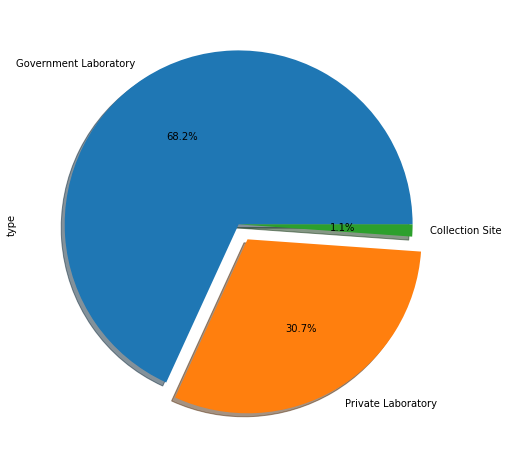

In [10]:
Lab_count.plot(kind= 'pie', figsize= (8,8), autopct= '%1.1f%%', explode = (0,0.1,0), shadow= True)